# **TAREA 1 OPTMIZACIÓN**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from IPython.display import display, HTML

In [ ]:
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# **Método de Bisección**

#### Este algoritmo busca las raices de una función dividiendo los intervalos a la mitad y seleccionando los subintervalos que tienen la raiz.


## Fórmulas usadas:

$$
\begin{aligned}
xr &= \frac{xl + xu}{2} \quad & error =\frac{xr_{new} - xr_{old}}{xr_{new}}
\end{aligned}
$$



In [ ]:
def biseccion_auto(f, xmin, xmax, pasos=100, tol=1e-6):
    function_name = "Bisección"
    h = (xmax - xmin) / pasos
    x, fa = xmin, f(xmin)
    a = b = None

    # Buscar intervalo con cambio de signo
    for _ in range(pasos):
        x2 = x + h
        fb = f(x2)
        if fa * fb <= 0:
            a, b = x, x2
            break
        x, fa = x2, fb

    if a is None:
        raise ValueError("No se encontró cambio de signo en el rango dado.")

    iteraciones = []
    n = 0
    error = float("inf")
    xr_old = None

    # Algoritmo Bisección
    while error is None or error > tol:
        n += 1
        xr = (a + b) / 2
        fa_val = f(a)
        fc = f(xr)
        producto = fa_val * fc

        if xr_old is not None:
            error = abs((xr - xr_old)/xr)
        else:
            error = None

        # Guardar datos
        iteraciones.append({
            "Iteración": n,
            "Xl": a,
            "Xu": b,
            "Xr": xr,
            "f(Xl) * f(Xr)": producto,
            "Error": error
        })

        #Reglas
        if fc == 0:
            break
        if producto < 0:
            b = xr
        else:
            a = xr
        xr_old = xr

    df = pd.DataFrame(iteraciones)
    df.set_index("Iteración", inplace=True)
    return xr, df, function_name

# Algoritmos para la visualización de los gráficos y dataframe

In [ ]:
def plot_error_convergence(df):
    error_data = df[df["Error"].notna() & (df["Error"] != 0)].copy()

    if len(error_data) == 0:
        print("No hay datos de error suficientes para graficar")
        return

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    # Gráfico 1: Error vs Iteración (escala lineal)
    ax1.plot(error_data.index, error_data["Error"], 'o-', linewidth=2, markersize=8)
    ax1.set_xlabel('Iteración', fontsize=12)
    ax1.set_ylabel('Error Relativo', fontsize=12)
    ax1.set_title('Convergencia del Error - Escala Lineal', fontsize=14, fontweight='bold')
    ax1.grid(True, alpha=0.3)
    ax1.set_yscale('linear')

    # Gráfico 2: Error vs Iteración (escala logarítmica)
    ax2.semilogy(error_data.index, error_data["Error"], 's-', linewidth=2, markersize=8, color='red')
    ax2.set_xlabel('Iteración', fontsize=12)
    ax2.set_ylabel('Error Relativo (log)', fontsize=12)
    ax2.set_title('Convergencia del Error - Escala Logarítmica', fontsize=14, fontweight='bold')
    ax2.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

def plot_function_and_roots(f, xmin, xmax, root, df, name):
    x = np.linspace(xmin, xmax, 1000)
    try:
        y = [f(xi) for xi in x]
    except:
        print("Error al evaluar la función para el gráfico")
        return

    fig, ax = plt.subplots(1, 1, figsize=(12, 8))

    # Graficar la función
    ax.plot(x, y, 'b-', linewidth=2, label='f(x)')
    ax.axhline(y=0, color='k', linestyle='-', alpha=0.3)
    ax.axvline(x=0, color='k', linestyle='-', alpha=0.3)

    # Marcar la raíz encontrada
    ax.plot(root, f(root), 'ro', markersize=10, label=f'Raíz ≈ {root:.6f}')

    ax.set_xlabel('x', fontsize=12)
    ax.set_ylabel('f(x)', fontsize=12)
    ax.set_title(f'Método de {name} - Convergencia', fontsize=14, fontweight='bold')
    ax.legend()
    ax.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

def show_dataframe(df, name):

    df_styled = df.style.format({
        'Xl': '{:.6f}',
        'Xu': '{:.6f}',
        'Xr': '{:.6f}',
        'f(Xl)': '{:.6f}',
        'f(Xr)': '{:.6f}',
        'f(Xl) * f(Xr)': '{:.6f}',
        'Error': lambda x: f'{x:.2e}' if x is not None and x != 0 else 'N/A'
    }).background_gradient(subset=['Xr'], cmap='Blues')\
      .background_gradient(subset=['Error'], cmap='Reds')\
      .set_caption(f"Iteraciones del Método de {name}")\
      .set_table_styles([
          {'selector': 'caption',
           'props': [('font-size', '16px'), ('font-weight', 'bold')]},
          {'selector': 'th',
           'props': [('background-color', '#4CAF50'), ('color', 'white')]},
      ])

    display(df_styled)

## **NOTA:** El input recibe las funciones en lenguaje de python y se calcula automaticamente el cambio de signo de las funciones, ej:  x ** 3 + 4 * x ** 2 - 10

In [ ]:
expr = input("Ingresa la función f(x): ")
bisection_function = lambda x: eval(expr, {"x": x, "__builtins__": {}})
xr, df, name = biseccion_auto(bisection_function, 0, 5)

Ingresa la función f(x): x**3 + 4*x**2 - 10


# Mostrar Dataframe

In [ ]:
show_dataframe(df, name)

,Xl,Xu,Xr,f(Xl) * f(Xr),Error
Iteración,,,,,
1,1.350000,1.400000,1.375000,-0.040467,nan
2,1.350000,1.375000,1.362500,0.011238,9.17e-03
3,1.362500,1.375000,1.368750,-0.002621,4.57e-03
4,1.362500,1.368750,1.365625,-0.000294,2.29e-03
5,1.362500,1.365625,1.364063,0.000868,1.15e-03
6,1.364063,1.365625,1.364844,0.000123,5.72e-04
7,1.364844,1.365625,1.365234,-0.000000,2.86e-04
8,1.364844,1.365234,1.365039,0.000020,1.43e-04
9,1.365039,1.365234,1.365137,0.000005,7.15e-05


# Mostrar Gráficas

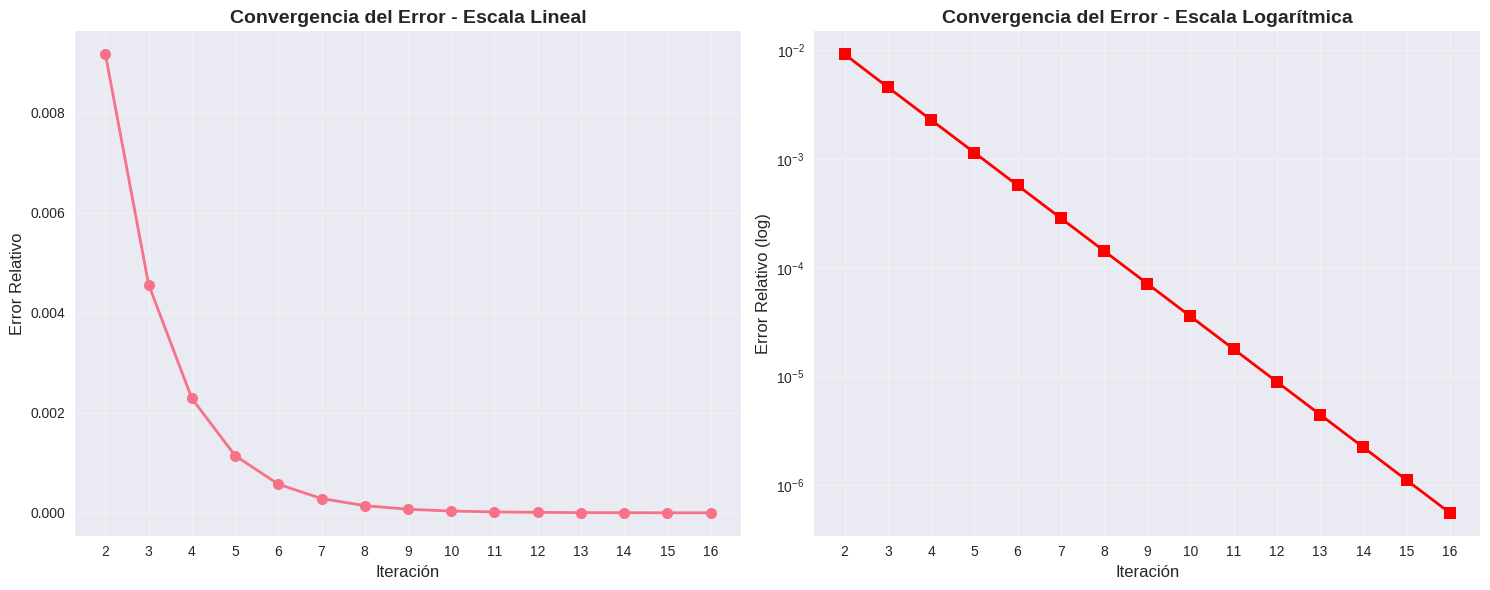

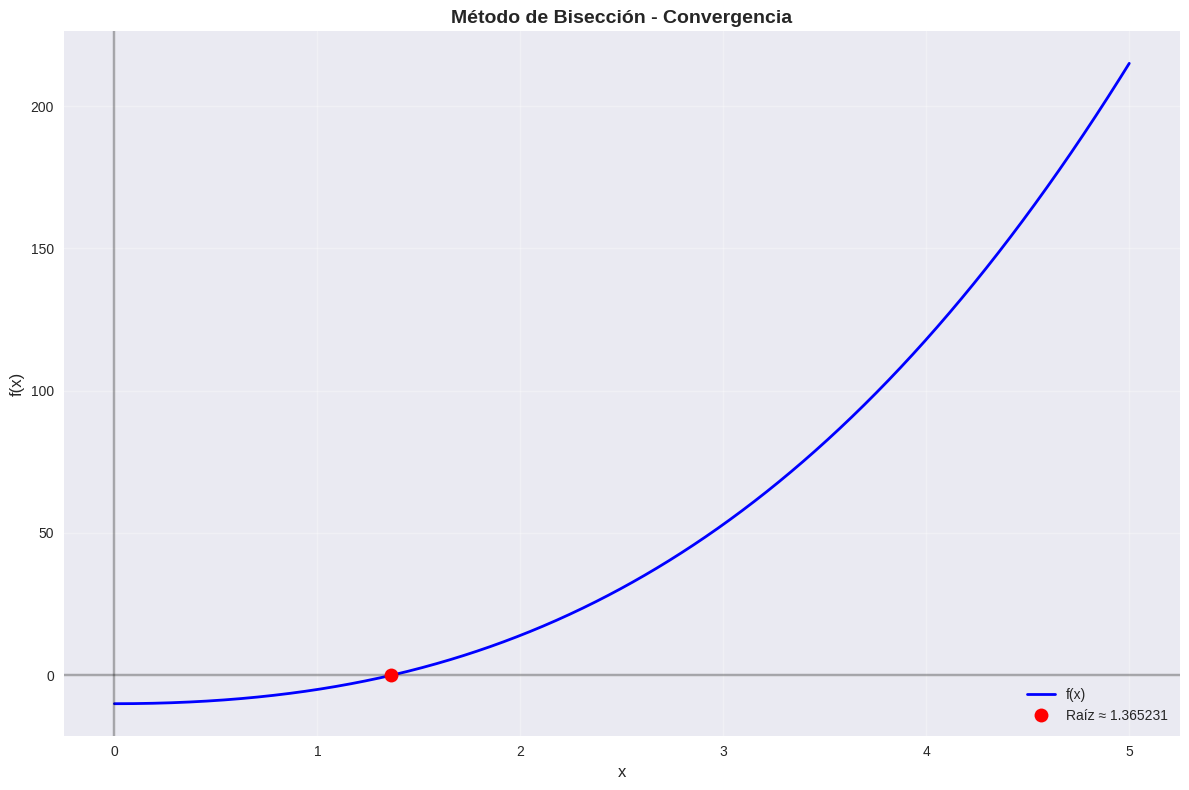

In [ ]:
plot_error_convergence(df)
plot_function_and_roots(bisection_function, 0, 5, xr, df, name)

## *El gráfico de convergencia nos ofrece una vista de como evoluciona una estimación de error*

# **Método de Falsa Posición**

## Este método es un algoritmo de busqueda de raíces que utiliza una sucesión de líneas secantes combinadas con el método de bisección para lograr una aproximación a una raíz de una función f.

## Fórmulas usadas:

$$
\begin{aligned}
xr &= {xu} - \frac{f(xu)(xl - xu)}{f(xl) - f(xu)} \quad & error =\frac{xr_{new} - xr_{old}}{xr_{new}}
\end{aligned}
$$



In [ ]:
def false_position_auto(f, xmin, xmax, pasos=100, tol=1e-6):
    function_name = "Falsa Posición"
    if f == None:
      raise ValueError("Debes ingresar una función")

    h = (xmax - xmin) / pasos
    x, fa = xmin, f(xmin)
    a = b = None

    # Buscar intervalo con cambio de signo
    for _ in range(pasos):
        x2 = x + h
        fb = f(x2)
        if fa * fb <= 0:
            a, b = x, x2
            break
        x, fa = x2, fb

    if a is None:
        raise ValueError("No se encontró cambio de signo en el rango dado.")

    iteraciones = []
    n = 0
    error = float("inf")
    xr_old = None

    # Algoritmo Bisección
    while error is None or error > tol:
        n += 1
        xr = b - ((f(b) * (a - b)) / (f(a) - f(b)))
        fa_val = f(a)
        fc = f(xr)
        producto = fa_val * fc

        if xr_old is not None:
            error = abs((xr - xr_old)/xr)
        else:
            error = None

        # Guardar datos
        iteraciones.append({
            "Iteración": n,
            "Xl": a,
            "Xu": b,
            "Xr": xr,
            "f(Xl) * f(Xr)": producto,
            "Error": error
        })

        if fc == 0:
            break
        if producto < 0:
            b = xr
        else:
            a = xr
        xr_old = xr

    df = pd.DataFrame(iteraciones)
    df.set_index("Iteración", inplace=True)
    return xr, df, function_name

In [ ]:
expr = input("Ingresa la función f(x): ")
false_function = lambda x: eval(expr, {"x": x, "__builtins__": {}})
xr2, df2, name2 = false_position_auto(false_function, 0, 5)

print(f"Raíz: {xr2:.8f}")
show_dataframe(df2, name2)

Ingresa la función f(x): x**3 + 4*x**2 - 10
Raíz: 1.36523001


,Xl,Xu,Xr,f(Xl) * f(Xr),Error
Iteración,,,,,
1,1.350000,1.400000,1.364972,0.001062,nan
2,1.364972,1.400000,1.365226,0.000000,1.86e-04
3,1.365226,1.400000,1.365230,0.000000,3.12e-06
4,1.365230,1.400000,1.365230,0.000000,5.26e-08


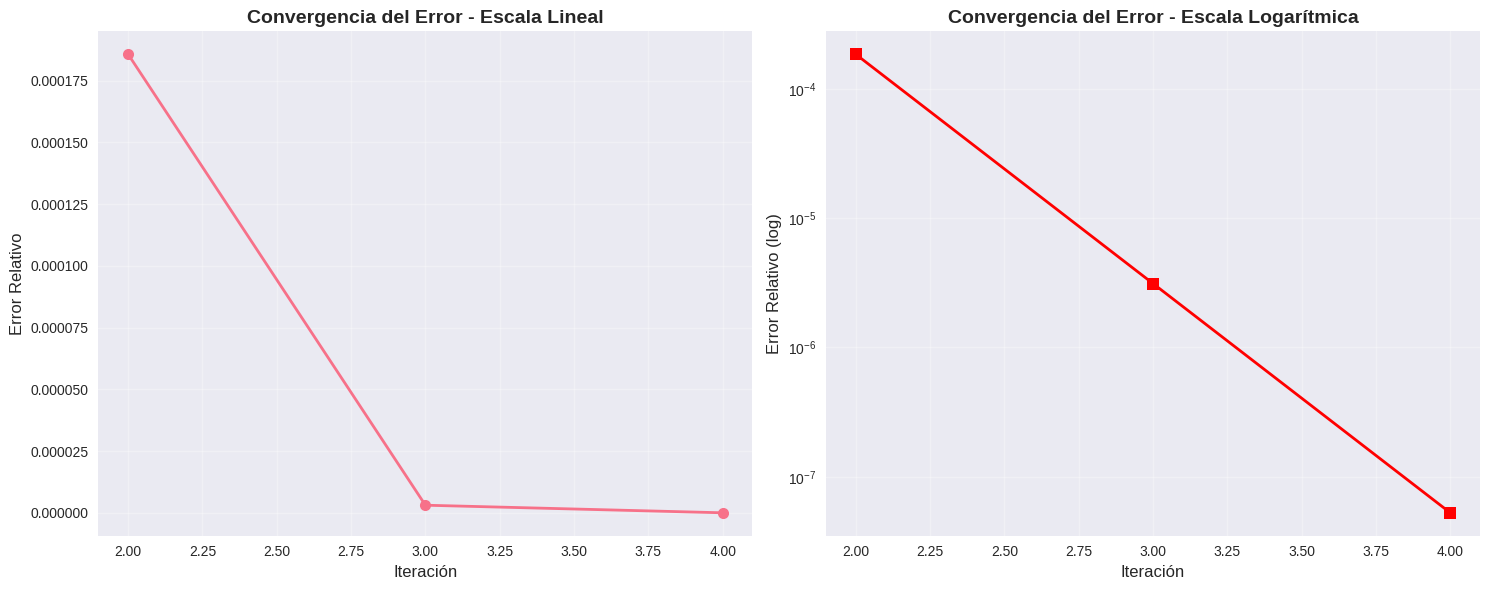

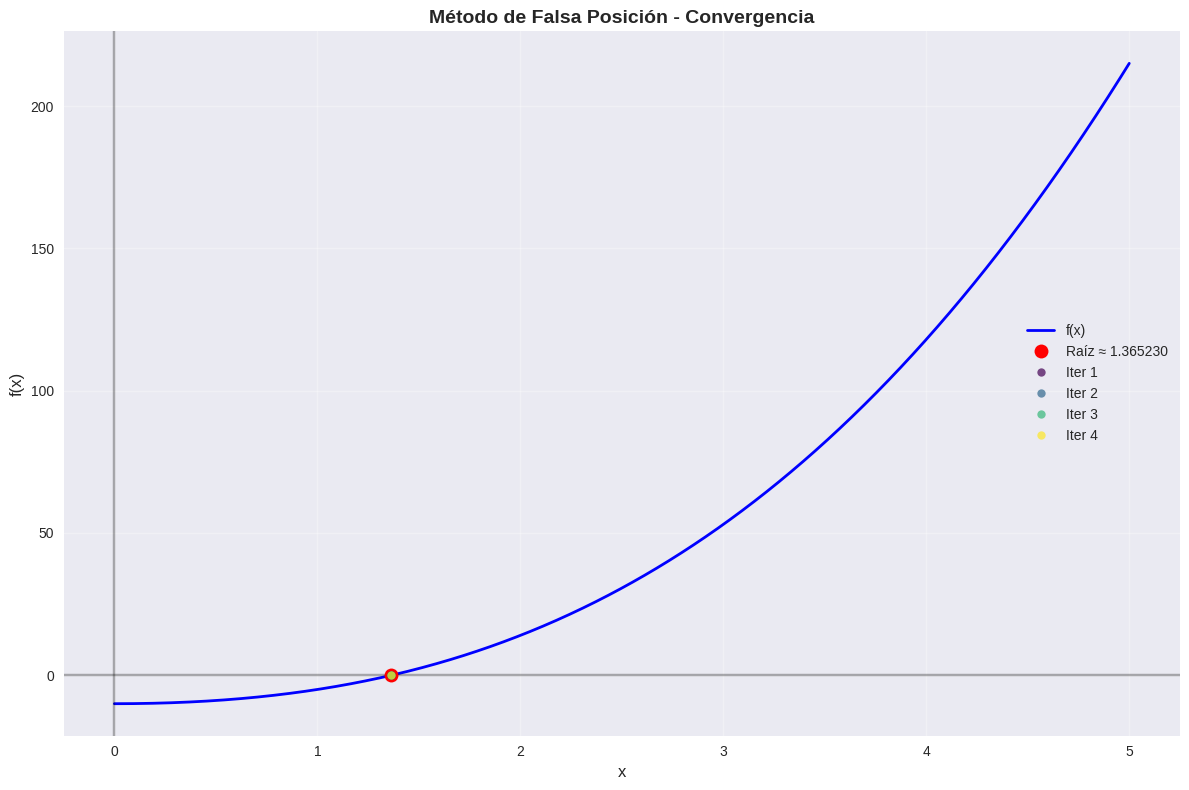

In [ ]:
plot_error_convergence(df2)
plot_function_and_roots(false_function, 0, 5, xr2, df2)

In [ ]:
"x**3 + 4*x**2 - 10"

'x**3 + 4*x**2 - 10'

# **Estudiante:** *Camilo Benavides Ramirez*